# Stock Trend Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [2]:
start = '2010-01-01'
end = '2020-12-31'

df = data.DataReader('AAPL','yahoo',start,end)


In [3]:
df = df.reset_index()

In [4]:
df

,Date,High,Low,Open,Close,Volume,Adj Close
0,2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.426001
1,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.526019
2,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.537304
3,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.433319
4,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.421426
...,...,...,...,...,...,...,...
2765,2020-12-24,133.460007,131.100006,131.320007,131.970001,54930100.0,130.620895
2766,2020-12-28,137.339996,133.509995,133.990005,136.690002,124486200.0,135.292648
2767,2020-12-29,138.789993,134.339996,138.050003,134.869995,121047300.0,133.491241
2768,2020-12-30,135.990005,133.399994,135.580002,133.720001,96452100.0,132.353027


In [5]:
df = df.drop(['Date','Adj Close'], axis=1)

In [6]:
df

,High,Low,Open,Close,Volume
0,7.619643,7.520000,7.611786,7.526071,352410800.0
1,7.660714,7.585000,7.622500,7.643214,493729600.0
2,7.699643,7.616071,7.664286,7.656429,601904800.0
3,7.686786,7.526786,7.656429,7.534643,552160000.0
4,7.571429,7.466071,7.562500,7.520714,477131200.0
...,...,...,...,...,...
2765,133.460007,131.100006,131.320007,131.970001,54930100.0
2766,137.339996,133.509995,133.990005,136.690002,124486200.0
2767,138.789993,134.339996,138.050003,134.869995,121047300.0
2768,135.990005,133.399994,135.580002,133.720001,96452100.0


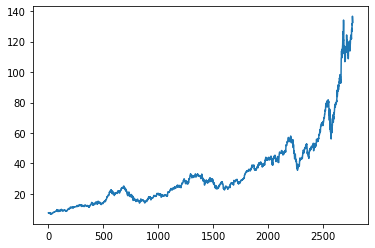

In [7]:
plt.plot(df.Close)
plt.show()

In [8]:
ma100 = df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2765    118.223525
2766    118.489800
2767    118.699475
2768    118.925550
2769    119.125175
Name: Close, Length: 2770, dtype: float64

In [9]:
ma200 = df.Close.rolling(200).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2765     99.158737
2766     99.494725
2767     99.866312
2768    100.218837
2769    100.573950
Name: Close, Length: 2770, dtype: float64

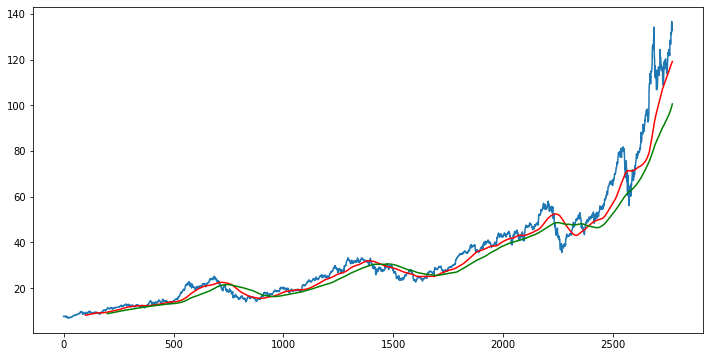

In [10]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')
plt.show()

In [11]:
df.shape

(2770, 5)

In [12]:
# Splitting Data into Training & Testing

# Here 70% data is for training purpose and 30% data for testing purpose.

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

In [13]:
print(data_training.shape)
print(data_testing.shape)

(1938, 1)
(832, 1)


In [14]:
data_testing.head()

,Close
1938,39.912498
1939,39.570000
1940,39.970001
1941,39.667500
1942,39.682499


In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.01953359],
       [0.02296349],
       [0.0233504 ],
       ...,
       [0.96032627],
       [0.98133429],
       [0.97664957]])

In [16]:
data_training_array.shape

(1938, 1)

In [17]:
x_train = []
y_train = []

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])


In [18]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [19]:
# Machine Learning Model

from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [20]:
model = Sequential()

model.add(LSTM(units = 50, activation = 'relu',return_sequences = True, input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu',return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu',return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [22]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train, epochs = 50)

Epoch 1/50
58/58 [==============================] - 26s 312ms/step - loss: 0.0428
Epoch 2/50
58/58 [==============================] - 18s 309ms/step - loss: 0.0088
Epoch 3/50
58/58 [==============================] - 19s 320ms/step - loss: 0.0074
Epoch 4/50
58/58 [==============================] - 17s 296ms/step - loss: 0.0068
Epoch 5/50
58/58 [==============================] - 16s 283ms/step - loss: 0.0069
Epoch 6/50
58/58 [==============================] - 18s 314ms/step - loss: 0.0059
Epoch 7/50
58/58 [==============================] - 22s 375ms/step - loss: 0.0061
Epoch 8/50
58/58 [==============================] - 20s 349ms/step - loss: 0.0056
Epoch 9/50
58/58 [==============================] - 19s 321ms/step - loss: 0.0051
Epoch 10/50
58/58 [==============================] - 19s 321ms/step - loss: 0.0047
Epoch 11/50
58/58 [==============================] - 19s 328ms/step - loss: 0.0050
Epoch 12/50
58/58 [==============================] - 19s 326ms/step - loss: 0.0045
Epoch 13/50
5

In [23]:
model.save('keras_model.h5')

In [24]:
data_testing.head()

,Close
1938,39.912498
1939,39.570000
1940,39.970001
1941,39.667500
1942,39.682499


In [25]:
data_training.tail(100)

,Close
1838,35.567501
1839,35.910000
1840,36.132500
1841,35.919998
1842,35.947498
...,...
1933,40.477501
1934,40.314999
1935,39.657501
1936,40.375000


In [31]:
past_100_days = data_training.tail(100)

In [32]:
final_df = past_100_days.append(data_testing, ignore_index=True)

C:\Users\dell\AppData\Local\Temp\ipykernel_14556\531349220.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing, ignore_index=True)


In [34]:
final_df.head()

,Close
0,35.567501
1,35.910000
2,36.132500
3,35.919998
4,35.947498


In [35]:
input_data = scaler.fit_transform(final_df)
input_data

array([[1.97745334e-04],
       [3.58404460e-03],
       [5.78390957e-03],
       [3.68289840e-03],
       [3.95479352e-03],
       [3.60874862e-03],
       [1.08510253e-02],
       [1.31497441e-02],
       [1.20374596e-02],
       [1.07274298e-02],
       [1.67338264e-02],
       [2.67444246e-02],
       [2.91667767e-02],
       [2.73623646e-02],
       [2.90678851e-02],
       [3.43821920e-02],
       [3.33934653e-02],
       [3.28249711e-02],
       [1.99223803e-02],
       [2.55826944e-02],
       [2.68680202e-02],
       [2.91667767e-02],
       [2.86971362e-02],
       [2.75601100e-02],
       [2.88701398e-02],
       [2.82274958e-02],
       [2.83757953e-02],
       [2.61264846e-02],
       [2.71646193e-02],
       [3.27755253e-02],
       [2.90184394e-02],
       [3.03037652e-02],
       [3.25777800e-02],
       [3.16385368e-02],
       [1.67832345e-02],
       [7.98377455e-03],
       [1.08757293e-02],
       [7.34113050e-03],
       [5.19067357e-03],
       [1.97745334e-04],


In [36]:
input_data.shape

(932, 1)

In [37]:
x_test = []
y_test = []

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [39]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(832, 100, 1)
(832,)


In [40]:
# Making Predictions

y_predicted = model.predict(x_test)

26/26 [==============================] - 4s 98ms/step


In [41]:
y_predicted.shape

(832, 1)

In [42]:
y_predicted

array([[0.13281615],
       [0.13295925],
       [0.13301829],
       [0.13300133],
       [0.13291821],
       [0.13277805],
       [0.13257623],
       [0.13229164],
       [0.131903  ],
       [0.13139677],
       [0.13078997],
       [0.13012302],
       [0.12943086],
       [0.1287453 ],
       [0.12809195],
       [0.12749103],
       [0.12695077],
       [0.12648137],
       [0.12609276],
       [0.1257886 ],
       [0.12556821],
       [0.12542883],
       [0.12536122],
       [0.12535687],
       [0.12542713],
       [0.12558828],
       [0.12583879],
       [0.12614036],
       [0.12644672],
       [0.12672746],
       [0.12696852],
       [0.12716371],
       [0.12731606],
       [0.12747201],
       [0.12770952],
       [0.12810105],
       [0.12867066],
       [0.1294108 ],
       [0.13033181],
       [0.13144831],
       [0.13275582],
       [0.13423938],
       [0.13586679],
       [0.13758218],
       [0.13931899],
       [0.140995  ],
       [0.14252312],
       [0.143

In [43]:
scaler.scale_

array([0.00988704])

In [44]:
scale_factor = 1/0.00988704
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

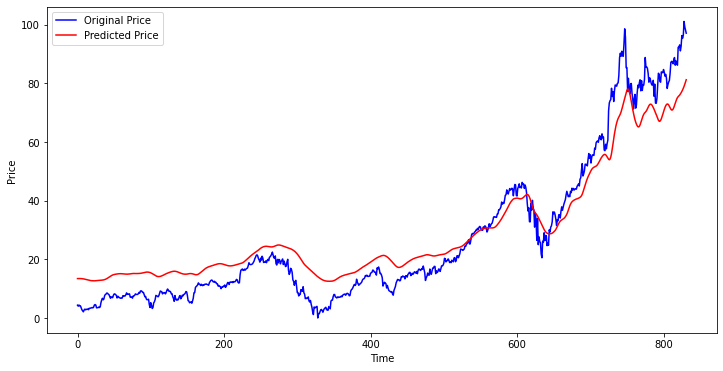

In [45]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label="Original Price")
plt.plot(y_predicted,'r', label="Predicted Price")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()